<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

### 1.2 NumPy’s PRNG

In [13]:
np.random.rand(10)
np.random.rand(1,1)

array([[0.85573657]])

In [32]:
random_numbers = np.random.rand(1000)
sum(random_numbers)
print(np.sum(random_numbers < .5)) #len([i for i in random_numbers if i <.5])
np.sum(random_numbers < .5) /1000 * 100

498


49.8

In [33]:
np.sum(random_numbers <.25) /1000 *100

25.1

In [34]:
np.sum(random_numbers >.75) /1000 *100

24.4

### 1.3 A simple graphical test

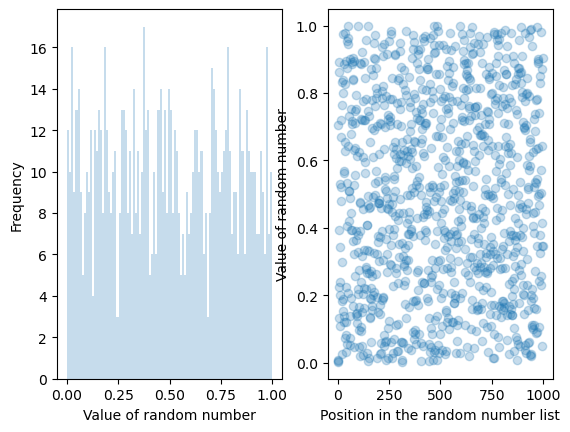

In [37]:
from matplotlib import pyplot as plt
n = 1000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows = 1, ncols = 2)
axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = .25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.show()

### 1.4 Uniformly beyond \([0,1)\)

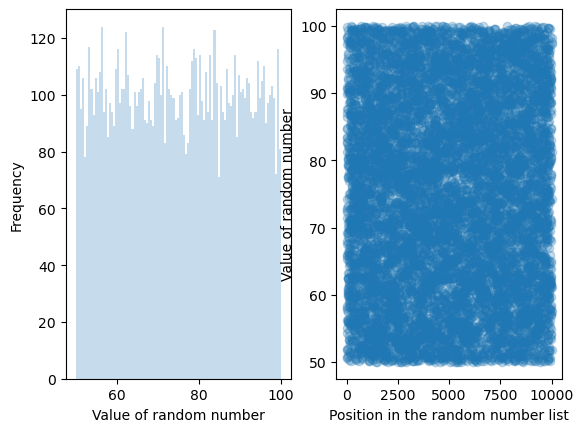

In [39]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows = 1, ncols = 2)
axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = .25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.show()

### 1.5 ‘seeding’ a PRNG

In [40]:
np.random.seed(1)
np.random.randint(0,100,10)

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1])

In [41]:
np.random.seed(1)
np.random.randint(0,100,10)

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1])

## 2 Simulating a Magic-8 Ball

In [2]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [11]:
questions = ['Will I get an A in SP2273?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I get an A in SP2273?
A: Yes.

Q: Will I be rich?
A: As I see it, yes.

Q: Will I be in trouble?
A: Concentrate and ask again.



## 3 Flipping Coins

### 3.1 A fair coin

In [12]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [13]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Head', 'Head', 'Head', 'Head', 'Tails', 'Head', 'Head',
       'Tails', 'Tails'], dtype='<U5')

In [8]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [9]:
no_of_coins = 1_00_000_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 50.00%


### 3.2 A biased coin

In [10]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 69.30%


### 3.3 A flipping experiment

In [11]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
print(heads_counts)
heads_probability = heads_counts/no_of_repeats
heads_probability

[  10  100  469 1205 2035 2506 2043 1107  411  101   13]


array([0.001 , 0.01  , 0.0469, 0.1205, 0.2035, 0.2506, 0.2043, 0.1107,
       0.0411, 0.0101, 0.0013])

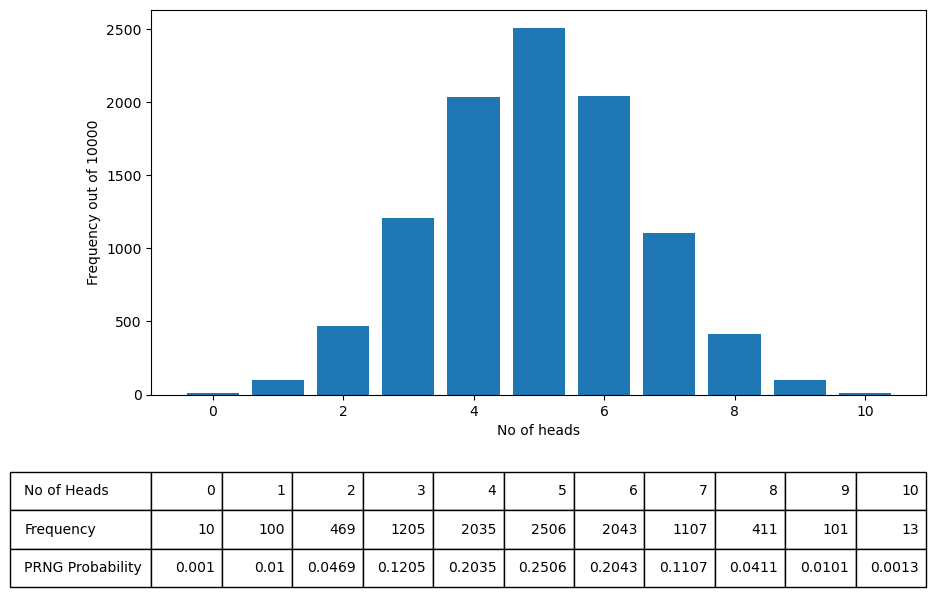

In [12]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
plt.show()

In [13]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


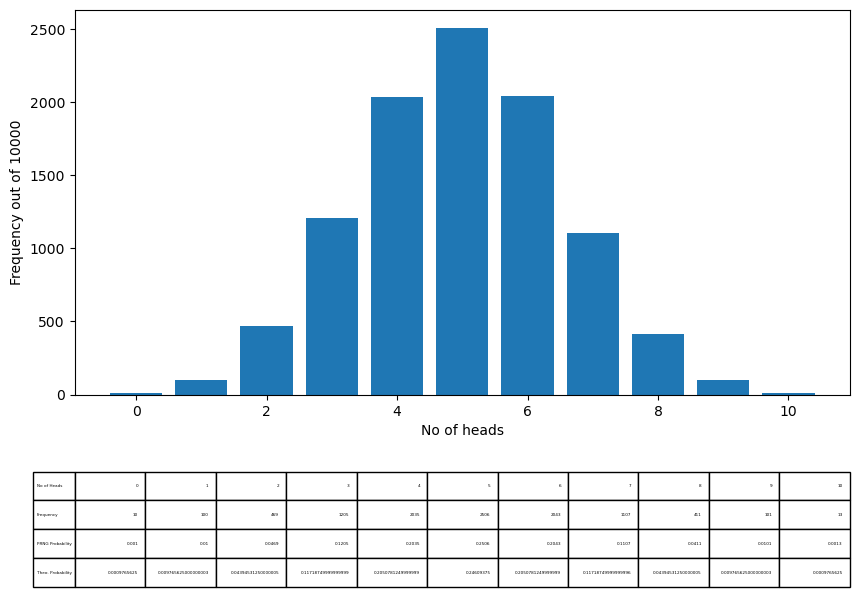

In [25]:
from scipy.stats import binom

binom.pmf(k=7, n = 10, p=.5)

binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, binomial_probabilities],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', "Theo. Probability"],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
plt.show()

## Exercise 1 :  12C, 13C

In [87]:
# question, what is this?
total = 0
for _ in range(100000):
    results = np.random.rand(27)
    no_of_13c = np.sum(results > 0.9889)
    total += no_of_13c/27
mean = total/(100000)*100
print(f'{mean:.2f}')

mean = 27 * 0.011
print(mean)
sd = (mean*0.9889)**0.5
print(sd)

(0.9889)**27

1.11
0.297
0.5419440007971303


0.7397997429318266